
# Obbiettivo

Verificato che l'approccio NN funziona proviamo a stabilire i meta-parametri migliori

# Risultato

I risultati di `GridSearchCV` variano da run a run quindi l'ho svolta piu volte e analizzato i risultati (non ho variato il solver perche dopo alcune run adam era consistentemente il migliore).

Nessun numero di neuroni tra quelli testati sembra essere significativamente migliore ma la funzione di attivazione `tanh` sembra essere mediamente migliore


In [2]:
from get_data import ceramiche_DB
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from tqdm import tqdm

In [12]:
X, y = ceramiche_DB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y)
nn = MLPClassifier(max_iter=500, solver='adam')
params = dict(
    hidden_layer_sizes  = list(range(2,30)),
    activation          = ['identity', 'logistic', 'tanh', 'relu']
)

In [4]:
clf = GridSearchCV(estimator=nn, param_grid=params, cv=5, scoring='accuracy', verbose = 0, n_jobs = -1)

In [88]:
## Attenzione richiede molto tempo per essere eseguito (circa 15 min sulla mia macchina)
import warnings

params = []
with warnings.catch_warnings():  
    warnings.simplefilter('ignore')  
    for i in tqdm(range(75)):  
        X, y = shuffle(X, y)
        trained = clf.fit(X, y)
        print(trained.best_params_, trained.best_score_)
        params.append((trained.best_params_, trained.best_score_))




  0%|          | 0/75 [00:00<?, ?it/s]{'activation': 'tanh', 'hidden_layer_sizes': 19} 0.9823008849557522



  1%|▏         | 1/75 [00:30<38:09, 30.94s/it]{'activation': 'logistic', 'hidden_layer_sizes': 23} 0.9823008849557522



  3%|▎         | 2/75 [00:57<36:09, 29.73s/it]{'activation': 'tanh', 'hidden_layer_sizes': 16} 0.9823008849557522



  4%|▍         | 3/75 [01:23<34:19, 28.60s/it]{'activation': 'identity', 'hidden_layer_sizes': 22} 0.9823008849557522



  5%|▌         | 4/75 [01:49<32:58, 27.87s/it]{'activation': 'tanh', 'hidden_layer_sizes': 12} 0.9911504424778761



  7%|▋         | 5/75 [02:16<31:59, 27.43s/it]{'activation': 'identity', 'hidden_layer_sizes': 19} 0.9823008849557522



  8%|▊         | 6/75 [02:43<31:15, 27.19s/it]{'activation': 'tanh', 'hidden_layer_sizes': 6} 0.9823008849557522



  9%|▉         | 7/75 [03:08<30:22, 26.80s/it]{'activation': 'logistic', 'hidden_layer_sizes': 24} 0.9823008849557522



 11%|█         | 8/75 [03:35<29:46, 26.67s/it]{'activa

# Trovare i metaparametri che sono piu` spesso i migliori

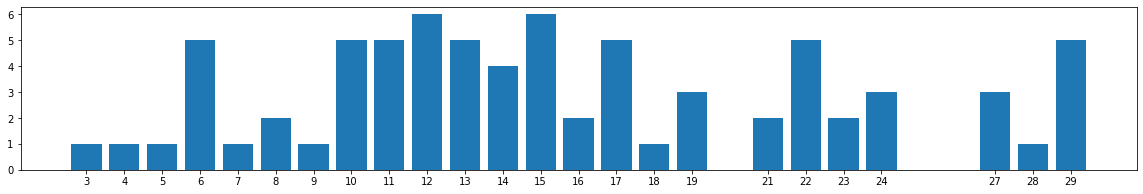

In [118]:
import matplotlib.pyplot as plt
hl_sizes= dict()
for p, _ in params:
    n = p['hidden_layer_sizes']
    if n in hl_sizes:
        hl_sizes[n] +=1
    else:
        hl_sizes[n] = 1
plt.figure(figsize=(20, 3))  # width:20, height:3
plt.bar(*zip(*hl_sizes.items()))
plt.xticks(list(hl_sizes.keys()))
plt.show()

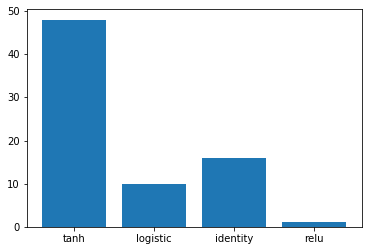

In [90]:
import matplotlib.pyplot as plt
activations= dict()
for p, _ in params:
    n = p['activation']
    # if p['hidden_layer_sizes'] != 5:
    #     continue
    if n in activations:
        activations[n] +=1
    else:
        activations[n] = 1

plt.bar(*zip(*activations.items()))
plt.xticks(list(activations.keys()))
plt.show()

# Trovare i parametri che hanno l'accuratezza media piu` alta

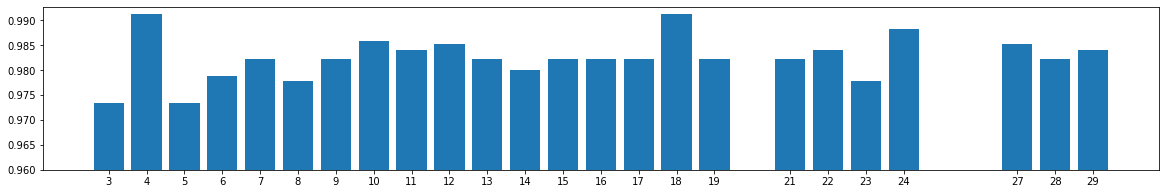

In [101]:
import matplotlib.pyplot as plt
hl_size = dict()
for p, s in params:
    p = p['hidden_layer_sizes']
    if p in hl_size:
        hl_size[p].append(s)
    else:
        hl_size[p] = [s]\

x, y = [], []
for k, e in hl_size.items():
    x.append(k)
    y.append(sum(e)/len(e) - 0.96)

plt.figure(figsize=(20, 3))  # width:20, height:3
plt.bar(x,y, bottom=0.96)


plt.xticks(list(hl_size.keys()))
plt.show()

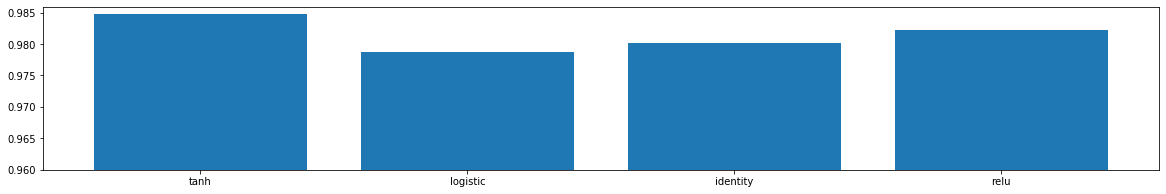

In [92]:
import matplotlib.pyplot as plt
activations = dict()
for p, s in params:
    p = p['activation']
    if p in activations:
        activations[p].append(s)
    else:
        activations[p] = [s]

x, y = [], []
for k, e in activations.items():
    x.append(k)
    y.append(sum(e)/len(e) - 0.96)

plt.figure(figsize=(20, 3))  # width:20, height:3
plt.bar(x,y, bottom=0.96)


plt.xticks(list(activations.keys()))
plt.show()

# Test configurazione

In [20]:
classifier = MLPClassifier(
                activation='tanh', hidden_layer_sizes=10,
                solver='adam', max_iter=500,
                )
from sklearn.metrics import confusion_matrix
classifier.fit(X_train, y_train)
c_matrix = confusion_matrix(y_test, classifier.predict(X_test))

print(c_matrix)
print(f"sensibilità = {c_matrix[1][1]/sum(c_matrix[1]):.3f}")
print(f"specificità = {c_matrix[0][0]/sum(c_matrix[0]):.3f}")
print(f"accuratezza = {classifier.score(X_test, y_test):.3f}")


C:\Users\scutt\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[[ 8  2]
 [ 0 24]]
sensibilità = 1.000
specificità = 0.800
accuratezza = 0.941
